In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

#### **Data Exploration**

In [114]:
# Load the dataset
customer_df = pd.read_csv('mall_customers.csv')
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
# Display the statistics of the dataset
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [116]:
# Categorize the Age column into bins
bins = [18, 30, 45, 60, float('inf')]
labels = [1, 2, 3, 4]
customer_df['Age Category'] = pd.cut(customer_df['Age'], bins=bins, labels=labels, right=False)
customer_df['Age Category'].value_counts()

Age Category
2    76
1    55
3    49
4    20
Name: count, dtype: int64

#### **Data Visualization**

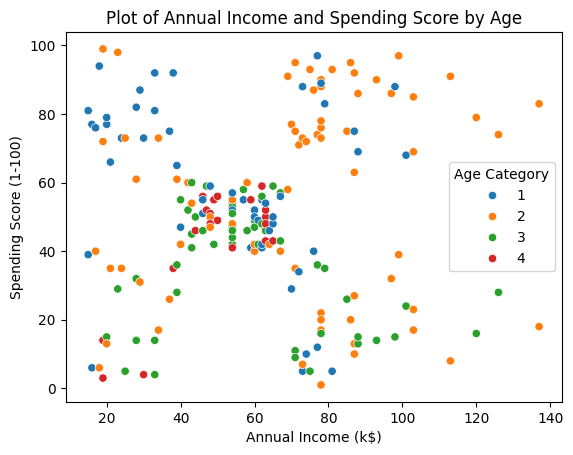

In [117]:
# Plot the distribution of the annual income and spending score
sns.scatterplot(data=customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age Category', palette='tab10')
plt.title("Plot of Annual Income and Spending Score by Age")
plt.show()

#### **Data Preprocessing**

In [118]:
# Drop unnecessary columns
customer_df.drop(columns=['CustomerID', 'Age', 'Gender', 'Age Category'], inplace=True)

In [119]:
# Standardize the numerical features
std_scaler = StandardScaler()
columns = customer_df.columns
customer_df[columns] = std_scaler.fit_transform(customer_df)
customer_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### **Model Training**

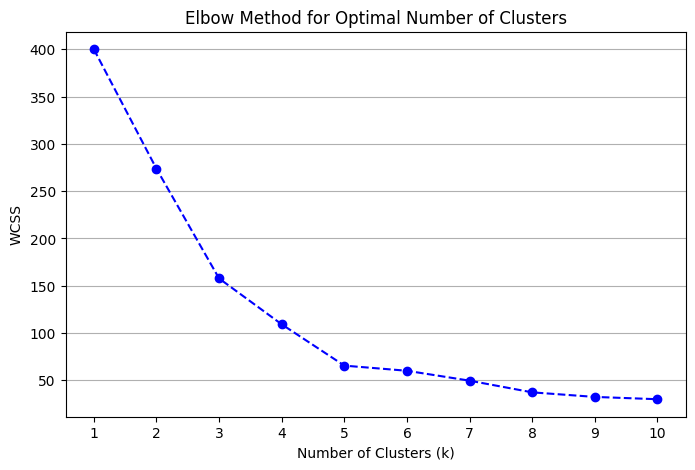

In [120]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(axis='y')
plt.show()

In [121]:
# Train a KMeans clustering model using best number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(customer_df)

KMeans(n_clusters=5, random_state=42)

#### **Model Evaluation**

In [122]:
# Calculate the model performance metrics
model_inertia = kmeans.inertia_
cluster_labels = kmeans.labels_
sil_score = silhouette_score(customer_df, cluster_labels)
db_index = davies_bouldin_score(customer_df, cluster_labels)

# Create a DataFrame of the performance metrics
metrics_df = pd.DataFrame({
    'Model Inertia': [model_inertia],
    'Silhouette Score': [sil_score],
    'Davies Bouldin Index': [db_index]
})
metrics_df

,Model Inertia,Silhouette Score,Davies Bouldin Index
0,65.568408,0.554657,0.572236


#### **Model Visualization**

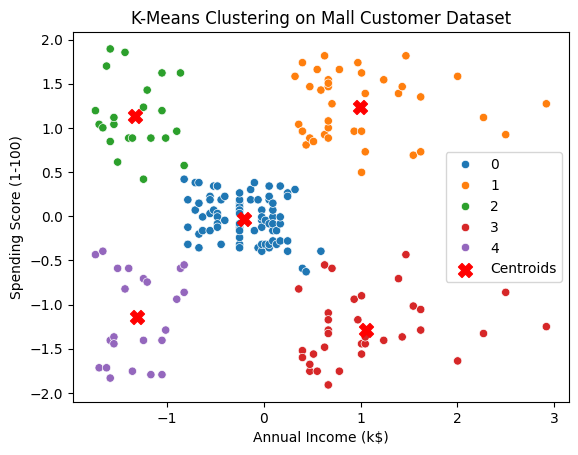

In [123]:
# Add the cluster labels to the DataFrame
customer_df['Cluster'] = kmeans.labels_

# Plot the clusters along with the centroids
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_df, palette='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label="Centroids")
plt.title("K-Means Clustering on Mall Customer Dataset")
plt.legend()
plt.show()